In [4]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from konlpy.tag import Komoran

In [6]:
data1 = pd.read_csv('감정 분류를 위한 대화 음성 데이터셋/5차년도.csv', encoding='cp949')
data2 = pd.read_csv('감정 분류를 위한 대화 음성 데이터셋/5차년도_2차.csv', encoding='cp949')
komoran = Komoran()

In [7]:
data = pd.concat([data1,data2], ignore_index=True)

In [111]:
emotion_dic = {}
for i, emot in enumerate(data['상황'].unique()):
    emotion_dic[emot] = i
    
print(emotion_dic)

{'disgust': 0, 'sad': 1, 'anger': 2, 'fear': 3, 'neutral': 4, 'happiness': 5, 'sadness': 6, 'angry': 7, 'surprise': 8}


In [8]:
data['상황'].unique()

array(['disgust', 'sad', 'anger', 'fear', 'neutral', 'happiness',
       'sadness', 'angry', 'surprise'], dtype=object)

In [109]:
emotion_dic = {'disgust' : 0, 'sad': 1, 'anger':2, 'fear':3, 'neutral':4}

In [110]:
data_inedexing = len(data['발화문'])//3*2

In [112]:
word_num = 1000

sequences = [komoran.morphs(sentence) for sentence in data['발화문']]
emotion_y = np.array([emotion_dic[emot] for emot in data['상황']])
print(sequences[0])


tokenizer = Tokenizer(num_words=word_num)
tokenizer.fit_on_texts(sequences)
sequences = tokenizer.texts_to_sequences(sequences)
padded = pad_sequences(sequences, padding='post')

['개', '를', '예쁘', '다고', '사놓', '고', '끝', '까지', '키우', '지', '도', '않', '고', '버리', '는', '사람', '들', '이', '엄청', '많', '아', '지', '었', '대', '.']


In [113]:
train_x = padded[:data_inedexing]
test_x = padded[data_inedexing:]
train_y = emotion_y[:data_inedexing]
test_y = emotion_y[data_inedexing:]

x_train, x_test, y_train, y_test = train_test_split(padded, emotion_y, test_size=0.3, random_state=777)

In [78]:
print(sequences[:5])
print(tokenizer)
print(train_y)

[[678, 29, 705, 84, 2775, 9, 873, 190, 396, 16, 17, 48, 9, 80, 10, 51, 25, 4, 123, 93, 5, 16, 11, 147, 1], [66, 17, 344, 14, 2, 1, 259, 10, 51, 4, 27, 2, 1], [90, 5, 1, 505, 4, 13, 34, 32, 5, 1, 617, 55, 223, 328, 132, 1], [68, 4, 514, 257, 4, 112, 196, 4, 27, 113, 1, 144, 712, 7, 169, 941, 12, 37, 1033, 4, 27, 147, 1], [72, 3, 16, 1, 678, 396, 10, 51, 4, 629, 59, 1410, 80, 10, 51, 17, 629, 10, 41, 36, 26]]
[0 0 1 ... 6 0 7]


In [ ]:
tf.debugging.set_log_device_placement(True)

a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

In [122]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=68), 
  tf.keras.layers.LSTM(units=50), 
  tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [123]:
word_num = 3000

sequences = [komoran.morphs(sentence) for sentence in data['발화문']]
emotion_y = np.array([emotion_dic[emot] for emot in data['상황']])
print(sequences[0])


tokenizer = Tokenizer(num_words=word_num)
tokenizer.fit_on_texts(sequences)
sequences = tokenizer.texts_to_sequences(sequences)
padded = pad_sequences(sequences, padding='post')

['개', '를', '예쁘', '다고', '사놓', '고', '끝', '까지', '키우', '지', '도', '않', '고', '버리', '는', '사람', '들', '이', '엄청', '많', '아', '지', '었', '대', '.']


In [124]:
checkpoint_path = f"model-3_{word_num}"+"/cp-{epoch:04d}-{accuracy:.4f}-{val_accuracy:.4f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)
batch_size = 64

model-3_3000


In [125]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True)
history = model.fit(x_train, y_train, epochs=50, 
            callbacks=[cp_callback],
            batch_size=batch_size, validation_split=0.2)

Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 2.1653 - accuracy: 0.1612
Epoch 1: saving model to model-3_3000\cp-0001-0.1612-0.1599.ckpt
258/258 [==============================] - 27s 99ms/step - loss: 2.1653 - accuracy: 0.1612 - val_loss: 2.1557 - val_accuracy: 0.1599
Epoch 2/50
258/258 [==============================] - ETA: 0s - loss: 2.1628 - accuracy: 0.1629
Epoch 2: saving model to model-3_3000\cp-0002-0.1629-0.1629.ckpt
258/258 [==============================] - 27s 103ms/step - loss: 2.1628 - accuracy: 0.1629 - val_loss: 2.1561 - val_accuracy: 0.1629
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 2.1630 - accuracy: 0.1652
Epoch 3: saving model to model-3_3000\cp-0003-0.1652-0.1629.ckpt
258/258 [==============================] - 26s 101ms/step - loss: 2.1630 - accuracy: 0.1652 - val_loss: 2.1541 - val_accuracy: 0.1629
Epoch 4/50
258/258 [==============================] - ETA: 0s - loss: 2.1623 - accuracy: 0.1646
Epoch 4: saving mode

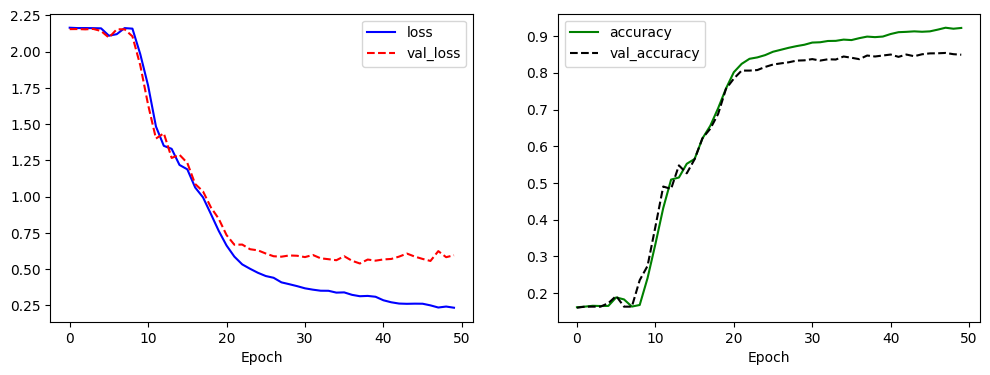

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [127]:
model.evaluate(x_test, y_test, verbose=0)

[0.6061074733734131, 0.8522005677223206]

In [121]:
test_sentence = '재미 없다.'
print(test_sentence)
test_sentence = komoran.morphs(test_sentence)
print(test_sentence)
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
print(test_sentences)
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
print(test_X_1)
test_X_1 = pad_sequences(test_X_1, padding='post',maxlen=68)
print(test_X_1)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

재미 없다.
['재미', '없', '다', '.']
[['재미'], ['재미', '없'], ['재미', '없', '다'], ['재미', '없', '다', '.']]
[[], [27], [27, 35], [27, 35, 1]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [27 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [27 35  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
1/1 [========================